In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [5]:
# Load training dataset as dictionary of numpy arrays
dataset_path = "dataset/train.npz"
data_dict = np.load(dataset_path)

# Extract design and scattering paramters array
design = data_dict["parameters"]
S      = data_dict["S"]

# The design array has shape (samples, parameters).
# In other words, design[0,:] is the 12 design parameters d_i of the first PhC.
print("Shape of design array:", design.shape)

# The S array has shape (samples, out_ports, in_ports).
# There are 2 in-ports: 
# - incoming x-polarized
# - incoming y-polarized
# There are 4 out-ports:
# - reflected x-polarized
# - reflected y-polarized
# - transmitted x-polarized
# - transmitted y-polarized
print("Shape of S array:", S.shape)

# These are the scattering parameters used in the paper
Sxx = S[:,2,0]
Syy = S[:,3,1]
Syx = S[:,3,0]

Shape of design array: (12000, 12)
Shape of S array: (12000, 4, 2)


# Plot a sample from the dataset

Design parameters:
[ 0.2568891  -0.23581898 -0.49041765  0.13634103 -0.24765258  0.67190417
  0.01222814  0.37672088 -0.46252137  0.12694266 -0.03401258 -0.89588413]


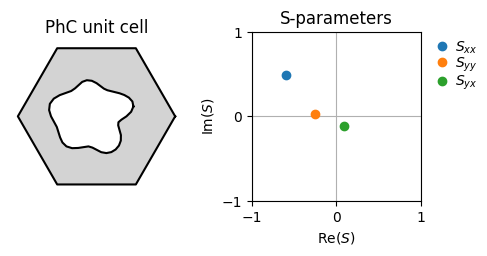

In [8]:
from parameterization import visualize

sample_id = 42

fig, axs = plt.subplots(1, 2, figsize=(5,2.5))

ax = axs[0]
ax.set_title("PhC unit cell")

# Set plot_control_points=True to see how shape of hole corresponds to design paramters
visualize(ax, design[sample_id], plot_control_points=False)
print("Design parameters:")
print(design[sample_id])


ax = axs[1]
ax.set_title("S-parameters")
ax.plot(np.real(Sxx[sample_id]), np.imag(Sxx[sample_id]), "C0o", label="$S_{xx}$")
ax.plot(np.real(Syy[sample_id]), np.imag(Syy[sample_id]), "C1o", label="$S_{yy}$")
ax.plot(np.real(Syx[sample_id]), np.imag(Syx[sample_id]), "C2o", label="$S_{yx}$")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.grid()
ax.set_xlabel("Re($S$)")
ax.set_ylabel("Im($S$)")
ax.set_aspect(1)
ax.legend(loc="upper left", bbox_to_anchor=(1,1), borderpad=0, frameon=False, labelspacing=0, handletextpad=0)

fig.tight_layout()
